# Pre-Processing

## Import dataset and library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/hotel_bookings_data.csv')

In [3]:
pd.set_option('display.max_columns', None)

## Handling Duplicated Value

In [4]:
df.duplicated().sum()

33261

In [5]:
df = df.drop_duplicates()
df.duplicated().sum()

0

## Handling NULL Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86129 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86125 non-null  float64
 11  babies                          86129 non-null  int64  
 12  meal                           

Columns that have null values
- City
- Agent
- Company

In [7]:
df[df.city.isnull()].head()
#City Column, which has a null value, will be ignored because the proportion is small and will be visualized.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
30,Resort Hotel,0,118,2017,September,27,1,4,10,1,0.0,0,Breakfast,NaN,Direct,Direct,0,0,0,2,No Deposit,NaN,NaN,0,Personal,62.0,0,2,Check-Out
4127,Resort Hotel,1,0,2018,April,8,15,0,0,0,0.0,0,No Meal,NaN,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,NaN,383.0,0,Personal,0.0,0,0,Canceled
7092,Resort Hotel,1,8,2018,September,30,21,0,1,1,0.0,0,Breakfast,NaN,Corporate,Corporate,0,0,0,0,No Deposit,NaN,204.0,0,Personal,73.0,0,2,Canceled
7860,Resort Hotel,1,39,2018,October,36,30,0,5,2,0.0,0,Dinner,NaN,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,159.0,0,5,Canceled
8779,Resort Hotel,1,0,2018,December,42,13,0,1,1,0.0,0,Breakfast,NaN,Corporate,Corporate,0,0,0,0,No Deposit,NaN,457.0,0,Personal,50.0,0,0,Canceled


In [8]:
df[df.agent.isnull()].head()
#Agent column, which is null, will be replaced with 0, assuming the hotel booking is not through an agent.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.00,0,0,Check-Out
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,107.00,0,0,Check-Out
18,Resort Hotel,0,0,2017,September,27,1,0,1,2,0.0,0,Breakfast,Kota Yogyakarta,Corporate,Corporate,0,0,0,0,No Deposit,NaN,110.0,0,Personal,107.42,0,0,Check-Out


In [9]:
df[df.company.isnull()].head()
#The null Company column will be replaced with 0, assuming the hotel booking is not on behalf of the company.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [10]:
#Fill Null Values

df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

## Extract Columns

In [11]:
# Total Guest = Adults + Childrens + Babies
df['total_guest'] = df['adults'] + df['children'] + df['babies']
df.drop(['adults', 'children', 'babies'], axis=1, inplace=True)

## Checking Descriptive Statistics

In [12]:
#Numeric
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guest
count,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86129.000000,86125.000000
mean,0.275587,79.246224,2018.215467,26.796433,15.806511,1.009753,2.633225,0.039499,0.030570,0.186569,0.271987,81.199166,10.800021,0.645114,106.634109,0.085233,0.705059,2.029806
std,0.446812,85.498774,0.683948,13.675130,8.840436,1.033402,2.058316,0.194780,0.371465,1.744405,0.729529,109.964005,53.484435,9.282699,55.175319,0.283070,0.833525,0.796371
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2.000000
50%,0.000000,49.000000,2018.000000,27.000000,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.750000,0.000000,1.000000,2.000000
75%,1.000000,124.000000,2019.000000,37.000000,23.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,0.000000,134.510000,0.000000,1.000000,2.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,55.000000


In [13]:
#Average Daily Rate (ADR) has a negative value which may be an input error, so the value is changed to positive.
df[df['adr'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
14969,Resort Hotel,0,195,2019,May,10,5,4,6,Breakfast,Kabupaten Bangka,Groups,Direct,1,0,2,2,No Deposit,273.0,0.0,0,Family,-6.38,0,0,Check-Out,2.0


In [14]:
df['adr'] = df.adr.replace(-6.38, 6.38)

In [15]:
#Object
df.describe(include='object')

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,86129,86129,86129,85679,86129,86129,86129,86129,86129
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,52575,11150,67088,26903,51393,68141,85024,71648,62393


In [16]:
categorical = ['hotel','arrival_date_year', 'arrival_date_month', 'meal','city', 'market_segment', 'distribution_channel',
           'deposit_type', 'customer_type', 'reservation_status', 'agent', 'company']

In [17]:
for i in categorical:
  print(df[i].value_counts())
  print(('*')*100)

City Hotel      52575
Resort Hotel    33554
Name: hotel, dtype: int64
****************************************************************************************************
2018    41841
2019    31423
2017    12865
Name: arrival_date_year, dtype: int64
****************************************************************************************************
October      11150
September     9986
July          8242
June          7811
August        7657
May           7435
December      6719
November      6457
April         6035
February      5082
January       4923
March         4632
Name: arrival_date_month, dtype: int64
****************************************************************************************************
Breakfast     67088
No Meal        9442
Dinner         8798
Undefined       454
Full Board      347
Name: meal, dtype: int64
****************************************************************************************************
Kota Denpasar              26903
Kabupaten Bangka     

In [18]:
#Rename columns and value

df.rename(columns = {'meal':'meal_type'}, inplace = True)
df['meal_type'] = df['meal_type'].replace('Undefined', 'Lunch')

## Handling Datetime

In [19]:
# Add date column

df['month'] = pd.to_datetime(df.arrival_date_month, format='%B').dt.month
df.rename(columns = {'arrival_date_year':'year', 'arrival_date_day_of_month':'day'}, inplace = True)
df['date'] = pd.to_datetime(df[['year','month','day']], errors='coerce')

In [20]:
#Checkin Null Value for Date column
month_null = df[df['date'].isnull()]
month_null.arrival_date_month.unique()

array(['September', 'February'], dtype=object)

In [21]:
month_null.sort_values('arrival_date_month')

,hotel,is_canceled,lead_time,year,arrival_date_month,arrival_date_week_number,day,stays_in_weekend_nights,stays_in_weekdays_nights,meal_type,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,month,date
31812,Resort Hotel,0,123,2018,February,53,31,2,5,Breakfast,Kota Surabaya,Online TA,TA/TO,0,0,0,1,No Deposit,242.0,0.0,0,Personal,47.57,0,2,Check-Out,3.0,2,NaT
46310,City Hotel,1,208,2017,February,53,29,0,4,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,8.0,0.0,0,Personal,75.44,0,0,Canceled,2.0,2,NaT
46311,City Hotel,0,159,2017,February,53,29,0,4,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,1,No Deposit,3.0,0.0,111,Family,70.50,0,0,Check-Out,2.0,2,NaT
46312,City Hotel,1,197,2017,February,53,29,0,4,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,8.0,0.0,0,Personal,110.43,0,0,Canceled,2.0,2,NaT
46313,City Hotel,1,140,2017,February,53,29,0,5,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,Non Refund,3.0,0.0,0,Personal,70.00,0,0,Canceled,2.0,2,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38969,Resort Hotel,0,169,2019,September,31,31,1,3,Dinner,Kota Denpasar,Online TA,TA/TO,0,0,0,1,No Deposit,240.0,0.0,0,Personal,212.00,0,4,Check-Out,3.0,9,NaT
38968,Resort Hotel,0,193,2019,September,31,31,1,3,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,1,No Deposit,240.0,0.0,0,Personal,224.00,0,3,Check-Out,3.0,9,NaT
38962,Resort Hotel,0,169,2019,September,31,31,1,3,Dinner,Kota Denpasar,Online TA,TA/TO,0,0,0,1,No Deposit,240.0,0.0,0,Personal,230.00,0,3,Check-Out,3.0,9,NaT
39008,Resort Hotel,0,170,2019,September,31,31,1,4,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,250.0,0.0,0,Personal,195.00,0,2,Check-Out,4.0,9,NaT


***Null values in the date column are in February and September. Since 2017-2019 is not a leap year, February will be rounded up to March, while September will be rounded to October.***

In [22]:
# Change error datetime
month_null['month'] = month_null['month'].replace({2:3,9:10})
month_null = month_null.drop(['date','day'], 1)
month_null['day'] = 1
month_null['date'] = pd.to_datetime(month_null[['year','month','day']])
month_null.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,hotel,is_canceled,lead_time,year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_weekdays_nights,meal_type,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,month,day,date
814,Resort Hotel,0,42,2017,September,31,0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,142.0,0.0,0,Contract,0.0,0,0,Check-Out,1.0,10,1,2017-10-01
815,Resort Hotel,0,46,2017,September,31,0,0,Dinner,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,0.0,1,0,Check-Out,2.0,10,1,2017-10-01
816,Resort Hotel,0,0,2017,September,31,0,1,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,188.0,0,0,Check-Out,4.0,10,1,2017-10-01
817,Resort Hotel,1,25,2017,September,31,0,1,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,153.0,0,2,Canceled,2.0,10,1,2017-10-01
818,Resort Hotel,1,16,2017,September,31,0,1,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,173.0,0,3,Canceled,2.0,10,1,2017-10-01


In [23]:
#Delete null value and append data with correct datetime
df = df[df['date'].notnull()]
df_clean = df.append(month_null)
df_clean = df_clean.drop(['year','arrival_date_month', 'day', 'month','arrival_date_week_number'],1)

#Normalize Date to ease the analysis
df_clean['date_normalize'] = df_clean['date'].map(lambda dt: dt.replace(day=1))

df_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_weekdays_nights,meal_type,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,date,date_normalize
0,Resort Hotel,0,342,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,2017-09-01,2017-09-01
1,Resort Hotel,0,737,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,2017-09-01,2017-09-01
2,Resort Hotel,0,7,0,1,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,2017-09-01,2017-09-01
3,Resort Hotel,0,13,0,1,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,2017-09-01,2017-09-01
4,Resort Hotel,0,14,0,2,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0,2017-09-01,2017-09-01


In [24]:
#Export csv to visualize data using dashboard in Tableau
df_clean.to_csv('booking_hotel_clean.csv', index=False)

# Total Booking

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_clean = pd.read_csv('/content/booking_hotel_clean.csv')

In [26]:
total_bookings = df_clean.groupby(['hotel','date_normalize']).agg({'hotel':'count'})
total_bookings.columns = ['total']
total_bookings = total_bookings.reset_index()
total_bookings['date_normalize'] = pd.to_datetime(total_bookings['date_normalize'])

In [27]:
#Export csv to visualize data using dashboard in Tableau
# total_bookings.to_csv('total_bookings.csv', index=False)

## Monthly

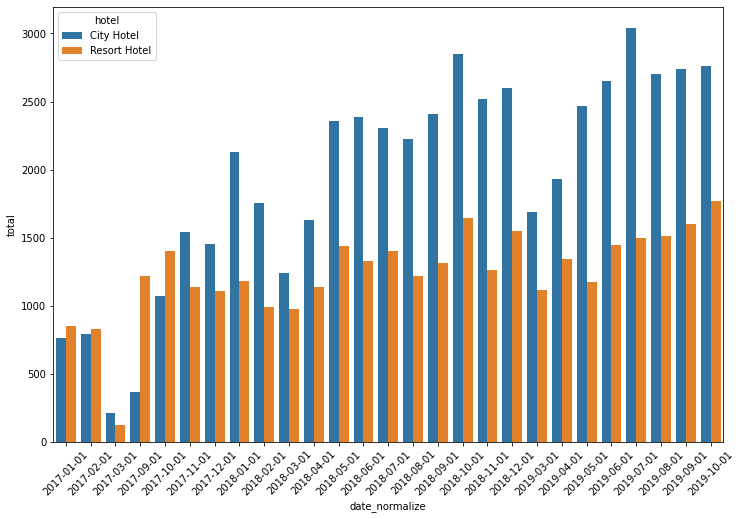

In [28]:
total_bookings1 = total_bookings.copy()
total_bookings1.date_normalize = total_bookings1.date_normalize.astype(str)
#Visualize Data

plt.figure(figsize=(12,8))
sns.barplot(x="date_normalize", y="total", hue="hotel", data=total_bookings1)
plt.xticks(rotation=45)
plt.show()

## Quarterly

In [29]:
total_bookings2 = total_bookings.copy()
total_bookings2['year'] = total_bookings2['date_normalize'].dt.year
total_bookings2['quarter'] = total_bookings2['date_normalize'].dt.quarter


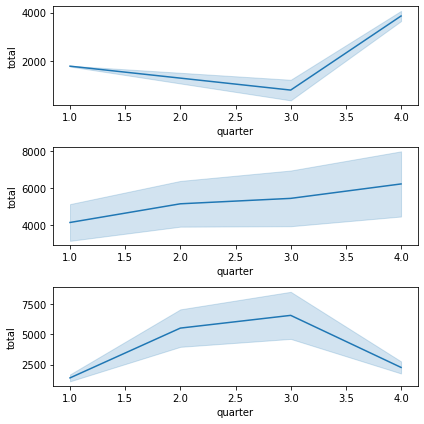

In [30]:
quarterly = total_bookings2.groupby(['hotel', 'quarter', 'year']).agg({'total':'sum'}).reset_index().sort_values('year', ignore_index=True)

fig, ax = plt.subplots(3,1,figsize=(6,6))
sns.lineplot(x ='quarter', y ='total', data = quarterly[0:6], ax=ax[0])
sns.lineplot(x ='quarter', y ='total', data = quarterly[6:14], ax=ax[1])
sns.lineplot(x ='quarter', y ='total', data = quarterly[14:], ax=ax[2])
plt.tight_layout()
plt.show()

## Yearly

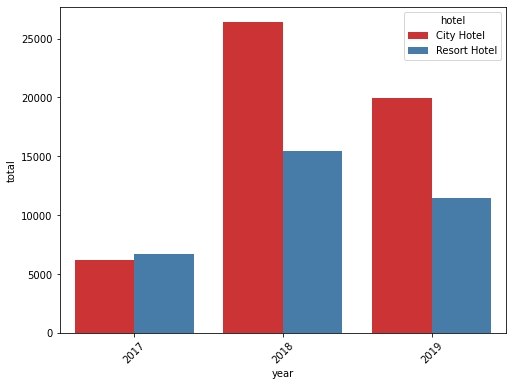

In [31]:
yearly = total_bookings2.groupby(['hotel', 'year']).agg({'total':'sum'}).reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='year',y='total',data=yearly,hue='hotel',palette='Set1')
plt.xticks(rotation=45)
plt.show()

# Impact Analysis of Stay Duration on Bookings Cancellation Rates

## Prepare dataframe

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
df_clean = pd.read_csv('/content/booking_hotel_clean.csv')

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [33]:
#Select the columns

stay = df_clean[['hotel', 'is_canceled', 'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'reservation_status']]
stay['stay_nights'] = stay['stays_in_weekend_nights'] + stay['stays_in_weekdays_nights']
stay = stay.drop(['stays_in_weekend_nights', 'stays_in_weekdays_nights'], axis=1)

In [34]:
#Separate canceled and non-cancelled bookings

stay_non_canceled = stay[stay['is_canceled']==0]
stay_canceled = stay[stay['is_canceled']==1]

print('Non_canceled')
print(stay_non_canceled['stay_nights'].describe())
print(('*'*100))
print('Canceled')
print(stay_canceled['stay_nights'].describe())

Non_canceled
count    62393.000000
mean         3.501531
std          2.703626
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         69.000000
Name: stay_nights, dtype: float64
****************************************************************************************************
Canceled
count    23736.000000
mean         4.014788
std          2.905548
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         56.000000
Name: stay_nights, dtype: float64


In [35]:
#Grouping dataset
stay_non_canceled['stay_category'] = np.where(stay_non_canceled['stay_nights'] > 7, 'Long', 
                                 (np.where(stay_non_canceled['stay_nights'] > 3, 'Mid', 'Short')))
stay_canceled['stay_category'] = np.where(stay_canceled['stay_nights'] > 10, 'Long', 
                                 (np.where(stay_canceled['stay_nights'] > 3, 'Mid', 'Short')))

## Grouped dataframe

In [36]:
#Non_canceled
stay_non_canceled_group = stay_non_canceled.groupby(['hotel', 'stay_category']).agg({'stay_category':'count'})
stay_non_canceled_group.columns = ['total_category']
stay_non_canceled_group = stay_non_canceled_group.reset_index()
stay_non_canceled_group['canceled'] = 'No'

#Canceled
stay_canceled_group = stay_canceled.groupby(['hotel', 'stay_category']).agg({'stay_category': 'count'})
stay_canceled_group.columns = ['total_category']
stay_canceled_group = stay_canceled_group.reset_index()
stay_canceled_group['canceled'] = 'Yes'

#Append dataframe
stay_duration = stay_non_canceled_group.append(stay_canceled_group)
stay_duration = stay_duration.sort_values('hotel', ignore_index=True)
stay_duration

,hotel,stay_category,total_category,canceled
0,City Hotel,Long,545,No
1,City Hotel,Mid,11526,No
2,City Hotel,Short,24650,No
3,City Hotel,Long,273,Yes
4,City Hotel,Mid,5984,Yes
5,City Hotel,Short,9597,Yes
6,Resort Hotel,Long,2655,No
7,Resort Hotel,Mid,9757,No
8,Resort Hotel,Short,13260,No
9,Resort Hotel,Long,368,Yes


In [37]:
# #Export dataframe
stay_duration.to_csv('stay_duration.csv', index=False)

## Cancel vs Valid Bookings

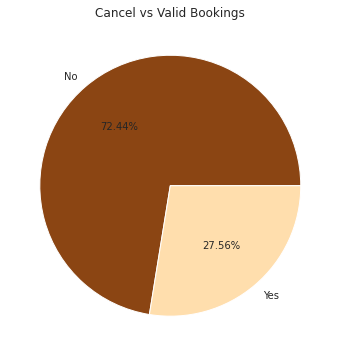

In [38]:
cancel_percentage = stay_duration.groupby('canceled').agg({'total_category':'sum'}).reset_index()

plt.figure(figsize=(6,6))
plt.pie(cancel_percentage.total_category, labels = cancel_percentage.canceled,
        autopct='%.2f%%', colors=['saddlebrown', 'navajowhite'])
plt.title('Cancel vs Valid Bookings')
plt.show()

## Cancellation Rate on Hotel Type

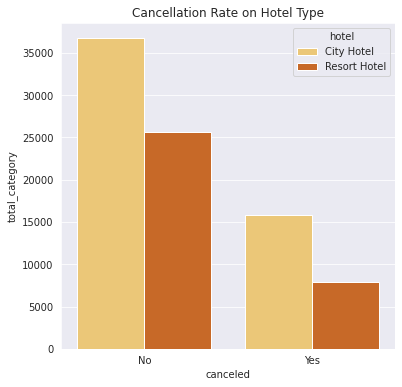

In [39]:
plt.figure(figsize=(6,6))
cancel_hotel_type = stay_duration.groupby(['hotel', 'canceled']).agg({'total_category':'sum'}).reset_index()
sns.barplot(data=cancel_hotel_type, x='canceled', y='total_category', hue='hotel', palette='YlOrBr')
plt.title('Cancellation Rate on Hotel Type')
plt.show()

## Stay Duration Cancellation Rate by Hotel

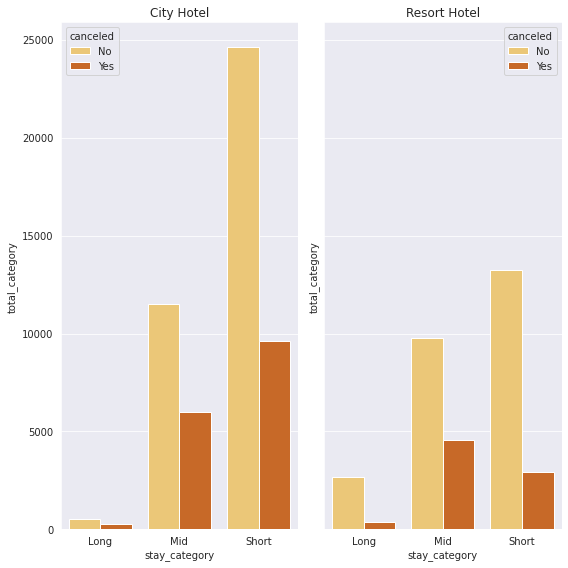

In [40]:
fig, ax = plt.subplots(1,2, figsize=(8,8), sharey=True)
sns.barplot(data=stay_duration[0:6], x='stay_category', y='total_category', hue='canceled', palette='YlOrBr', ax=ax[0])
sns.barplot(data=stay_duration[6:], x='stay_category', y='total_category', hue='canceled', palette='YlOrBr', ax=ax[1])
ax[0].set_title('City Hotel')
ax[1].set_title('Resort Hotel')
plt.tight_layout()
plt.show()


# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

df_clean = pd.read_csv('/content/booking_hotel_clean.csv')

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

## Average Lead Time on Cancellation Bookings by Hotel Type

In [42]:
df_clean.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_weekdays_nights,meal_type,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,date,date_normalize
0,Resort Hotel,0,342,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,2017-09-01,2017-09-01
1,Resort Hotel,0,737,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,2017-09-01,2017-09-01
2,Resort Hotel,0,7,0,1,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,2017-09-01,2017-09-01
3,Resort Hotel,0,13,0,1,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,2017-09-01,2017-09-01
4,Resort Hotel,0,14,0,2,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0,2017-09-01,2017-09-01


In [43]:
#Select the column

leadtime = df_clean[['hotel', 'is_canceled', 'lead_time', 'date_normalize']]

In [44]:
#Split dataset by Hotel Type

leadtime['is_canceled'].replace({0:'No', 1:'Yes'}, inplace=True)
alt_resort = leadtime[leadtime['hotel'] == 'Resort Hotel']
alt_city = leadtime[leadtime['hotel'] == 'City Hotel']

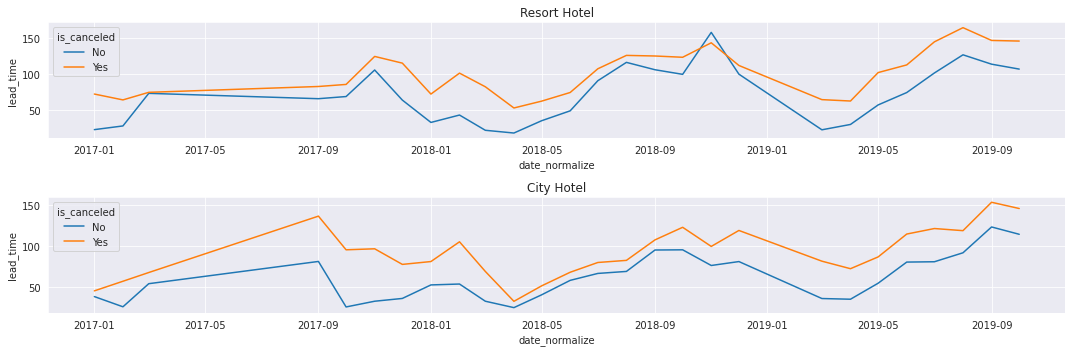

In [45]:
#Resort Hotel
alt_resort_grouped = alt_resort.groupby(['date_normalize','is_canceled']).agg({'lead_time':'mean'}).reset_index()
alt_resort_grouped['date_normalize'] = pd.to_datetime(alt_resort_grouped['date_normalize'])

#City Hotel
alt_city_grouped = alt_city.groupby(['date_normalize','is_canceled']).agg({'lead_time':'mean'}).reset_index()
alt_city_grouped['date_normalize'] = pd.to_datetime(alt_city_grouped['date_normalize'])

#Visualize
fig, ax = plt.subplots(2,1,figsize=(15,5))
sns.lineplot(data=alt_resort_grouped, x='date_normalize', y='lead_time', hue='is_canceled', ax=ax[0])
sns.lineplot(data=alt_city_grouped, x='date_normalize', y='lead_time', hue='is_canceled', ax=ax[1])
ax[0].title.set_text('Resort Hotel')
ax[1].title.set_text('City Hotel')
plt.tight_layout()
plt.show()


In [46]:
#Export Dataset
alt_resort_grouped.to_csv('alt_resort.csv', index=False)
alt_city_grouped.to_csv('alt_city.csv', index=False)

## Average Lead Time on Cancellation Bookings by Lead Time Category

In [47]:
#Use Statistic Descriptive to Grouping the Lead Time
leadtime['lead_time'].describe()

count    86129.000000
mean        79.246224
std         85.498774
min          0.000000
25%         11.000000
50%         49.000000
75%        124.000000
max        737.000000
Name: lead_time, dtype: float64

In [48]:
#Grouping Lead Time 
conditions = [
    leadtime['lead_time'].isin(list(range(0,12))),
    leadtime['lead_time'].isin(list(range(12,50))),
    leadtime['lead_time'].isin(list(range(50,125))),
    leadtime['lead_time'].isin(list(range(125,295))),
    leadtime['lead_time'].isin(list(range(295,738)))
]

choices = ['last_minute', 'short_lead', 'medium_lead', 'long_lead', 'very_long_lead']

leadtime['lead_category'] = np.select(conditions, choices)

In [49]:
#Split dataset by Lead Time

lastminute = leadtime[leadtime['lead_category'] == 'last_minute']
shortlead = leadtime[leadtime['lead_category'] == 'short_lead']
mediumlead = leadtime[leadtime['lead_category'] == 'medium_lead']
longlead = leadtime[leadtime['lead_category'] == 'long_lead']
verylonglead = leadtime[leadtime['lead_category'] == 'very_long_lead']

In [50]:
#Grouping dataset

alt_lastminute = lastminute.groupby(['hotel', 'date_normalize', 'is_canceled']).agg({'lead_time':'mean'}).reset_index()
alt_shortlead = shortlead.groupby(['hotel', 'date_normalize', 'is_canceled']).agg({'lead_time':'mean'}).reset_index()
alt_mediumlead = mediumlead.groupby(['hotel', 'date_normalize', 'is_canceled']).agg({'lead_time':'mean'}).reset_index()
alt_longlead = longlead.groupby(['hotel', 'date_normalize', 'is_canceled']).agg({'lead_time':'mean'}).reset_index()
alt_verylonglead = verylonglead.groupby(['hotel', 'date_normalize', 'is_canceled']).agg({'lead_time':'mean'}).reset_index()

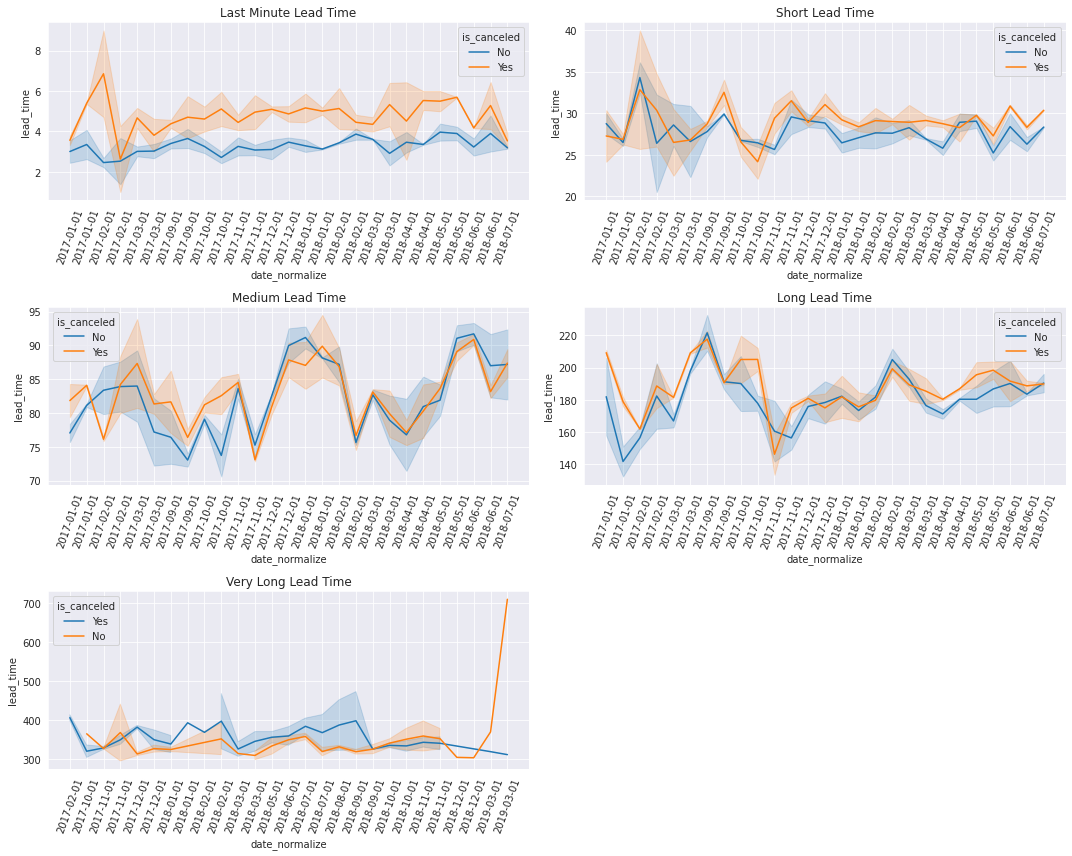

In [51]:
#Visualize

fig, ax = plt.subplots(3,2,figsize=(15,12))
sns.lineplot(data=alt_lastminute, x='date_normalize', y='lead_time', hue='is_canceled', ax=ax[0,0])
sns.lineplot(data=alt_shortlead, x='date_normalize', y='lead_time', hue='is_canceled', ax=ax[0,1])
sns.lineplot(data=alt_mediumlead, x='date_normalize', y='lead_time', hue='is_canceled', ax=ax[1,0])
sns.lineplot(data=alt_longlead, x='date_normalize', y='lead_time', hue='is_canceled', ax=ax[1,1])
sns.lineplot(data=alt_verylonglead, x='date_normalize', y='lead_time', hue='is_canceled', ax=ax[2,0])
ax[0,0].set_xticklabels(labels=alt_lastminute.date_normalize,rotation=70)
ax[0,1].set_xticklabels(labels=alt_shortlead.date_normalize,rotation=70)
ax[1,0].set_xticklabels(labels=alt_mediumlead.date_normalize,rotation=70)
ax[1,1].set_xticklabels(labels=alt_longlead.date_normalize,rotation=70)
ax[2,0].set_xticklabels(labels=alt_verylonglead.date_normalize,rotation=70)
ax[0,0].set_title('Last Minute Lead Time')
ax[0,1].set_title('Short Lead Time')
ax[1,0].set_title('Medium Lead Time')
ax[1,1].set_title('Long Lead Time')
ax[2,0].set_title('Very Long Lead Time')
fig.delaxes(ax[2,1])
plt.tight_layout()
plt.show()

In [52]:
# #Export Dataset
alt_lastminute.to_csv('alt_lastminute.csv', index=False)
alt_shortlead.to_csv('alt_shortlead.csv', index=False)
alt_mediumlead.to_csv('alt_mediumlead.csv', index=False)
alt_longlead.to_csv('alt_longlead.csv', index=False)
alt_verylonglead.to_csv('alt_verylonglead.csv', index=False)